In [1]:
import numpy as np

import scipy.io.wavfile as wavfile

import time
import os

import ffmpeg

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal

import glob

## Initialization
import IPython.display as ipd
import librosa.display

In [2]:
path = '_inputs/'

In [3]:
def convert_signal(path):
    """
    Convert m4a signal to wav signal
    
    Parameters:
        path (string): relative path of folder where m4a iles are located
        
    Returns:
        None - Function will add new wav file to path directory
    """

    for filename in os.listdir(path):
        if (filename.endswith(".m4a")):
            os.system("ffmpeg -i {0} -ar 16000 {1}.wav".format(path + filename, path + filename[:-4]))
        else:
            continue

In [4]:
def read_audio(path, file_name):
    '''
    Read files from specified path (relative or absolute)
    
    Parameters:
    path (string): relative path to read file
    file_name (string): name of file located in path we want to read

    Returns:
    tuple: rate and date of wav file
    
    '''
    rate, data = wavfile.read(str(path) + str(file_name))
    # data, rate = librosa.load(str(path) + str(filename))
    data = data.astype('int16')
    return rate, data

In [5]:
convert_signal(path)
file_name = 'TestVoice.wav'

In [6]:
sampling_rate, data = read_audio(path, file_name)
len_seconds = len(data) / sampling_rate
N = len(data)

In [7]:
ipd.Audio(data, rate=sampling_rate)

In [8]:
coef_no = int(N / 2) + 1 # amount of independent coefficients
samples = np.array(list(range(N))) # sample indices 
freqs = np.array(list(range(coef_no))) * sampling_rate / N # frequencies of current signal spectrum

In [9]:
coefs_TestWav = np.fft.rfft(data) # DFT coefs for 0, 1, ..., floor(N/2) base vectors
amplitude_spectr = np.abs(coefs_TestWav)
db_spectr = 10*np.log10(amplitude_spectr + 1) # db scale
k_max =  np.argmax(amplitude_spectr)
f_max = sampling_rate / N * k_max
print('maximal amplitude frequency: {}'.format(f_max))

maximal amplitude frequency: 436.11961210869805


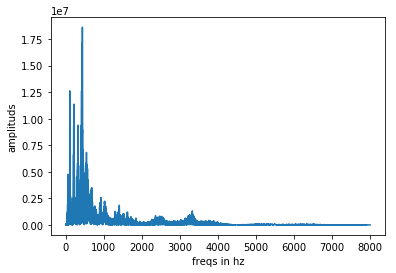

In [10]:
plt.plot(freqs, amplitude_spectr)
plt.xlabel('freqs in hz')
plt.ylabel('amplituds')
plt.show()

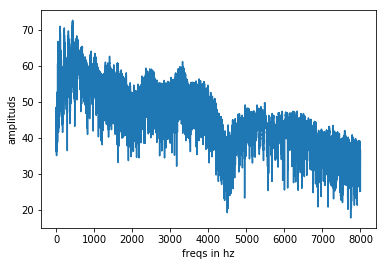

In [11]:
plt.plot(freqs, db_spectr)
plt.xlabel('freqs in hz')
plt.ylabel('amplituds')
plt.show()